## Membuat word cloud dan waffle charts

In [1]:
import numpy as np
import pandas as pd
from PIL import Image #cob=verting images into array

In [2]:
#download df dan masukkan dalam pandas df
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                       sheet_name = 'Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
#cek berapa banyak entrian
df_can.shape

(195, 43)

In [5]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [6]:
df_can.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

## Bersihkan data

In [7]:
# hapus kolom yang tdk perlu
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [8]:
# Gantinama kolom
df_can.rename(columns={'OdName' : 'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [9]:
# Menambahkan kolom total
df_can['Total'] = df_can.sum(axis=1)

<ipython-input-9-b9c30eedcba1>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [10]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [11]:
# untuk konsistensi buat semua kolom menjd tipe string
df_can.columns = list(map(str, df_can.columns))

In [12]:
#buat kolom country sbg index
df_can.set_index('Country', inplace=True)

In [13]:
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


## Visualizing Data using Matplotlib

In [14]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #untuk waffle charts

mpl.style.use('ggplot') #opsional

#cek versi matplotlib
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.7.1


## Waffle charts
menampilkan progress menuju tujuan

In [15]:
#lihat studi sebelumnya 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [16]:
# Langkah 1 tentukan proporsi setiap kategori sehubungan dg totalnya
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

#print out proportions
for i, proportions in enumerate(category_proportions):
  print(df_dsn.index.values[i] + ':' + str(proportions))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


In [17]:
# langkah kedua menentukan ukuran keseluruhan dari waffle chart
width = 40
height = 10

total_num_tiles = width*height #total number of tiles

print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [18]:
# langkah ketiga gunakan proporsi tiap kategori untuk menentukan jumlah ubin masing2 kategori
tiles_per_category = [round(proportion * total_num_tiles) for
proportion in category_proportions]

#print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
  print(df_dsn.index.values[i] + ':' + str(tiles))

Denmark:129
Norway:77
Sweden:194


In [19]:
#membuat matriks yang menyerupai wafel dan mengisinya
waffle_chart = np.zeros((height, width))

category_index = 0
tile_index = 0

for col in range(width):
  for row in range(height):
    tile_index+=1

    #if the number of tiles populated for the current category is
    #equal to its correspondinng allocated tiles..
    if tile_index > sum(tiles_per_category[0:category_index]):
      #.. proceed to the next category
      category_index += 1


    #set the class value to an integer, which inv=creases with class
    waffle_chart[row, col] = category_index

print('Waffle chart populated!')

Waffle chart populated!


In [20]:
#mari kita tampilkan matriksnya
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

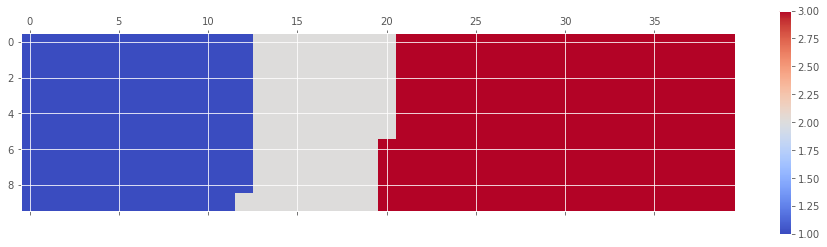

In [21]:
# step 5 petakan matriks diatas menjadi visual
fig = plt.figure()

#use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 432x288 with 0 Axes>

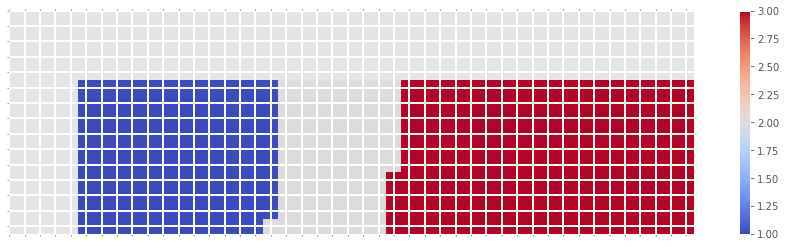

In [22]:
#Percantik chart
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

#get the axis
ax = plt.gca()

#set minor ticks
ax.set_xticks(np.arange(-5, (width), 1), minor=True)
ax.set_yticks(np.arange(-5, (height), 1), minor=True)

#add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 432x288 with 0 Axes>

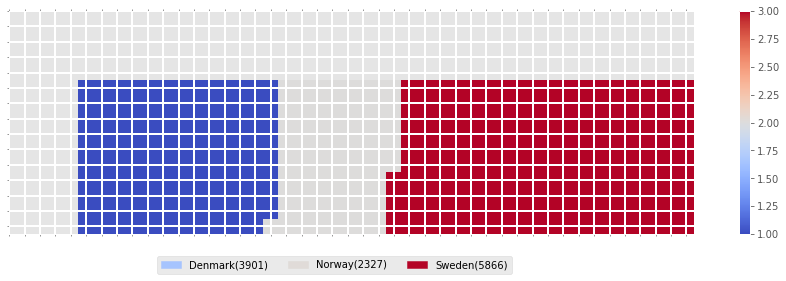

In [23]:
#tambahkan legend
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

#get the axis
ax = plt.gca()

#set minor ticks
ax.set_xticks(np.arange(-5, (width), 1), minor=True)
ax.set_yticks(np.arange(-5, (height), 1), minor=True)

#add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

#compute cumulative sum of infividual categories to match color
#schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) -1]

#create legend
legend_handles =[]
for i, category in enumerate(df_dsn.index.values):
  label_str = category + '(' + str(df_dsn['Total'][i]) + ')'
  color_val = colormap(float(values_cumsum[i])/total_values)
  legend_handles.append(mpatches.Patch(color=color_val,
label=label_str))
  
# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
           ) 

## WorldCloud

In [24]:
from wordcloud import WordCloud, STOPWORDS

print('WordCloud is imported')

WordCloud is imported


In [29]:
#download and save as alice_novel.txt
#open file and read it into variable
alice_novel = open('alice_novel.txt', 'r').read()

print('File downloaded and saved')

File downloaded and saved


In [30]:
#gunakan stopwords yang diimpor dari word_cloud. Gunakan
#set untuk menghapus stopword yang berlebihan
stopwords = set(STOPWORDS)

In [31]:
#Buat wordclooud object dan generate word cloud. Agar ringkas, buat word cloud
#hanya dengan 2000 kata pertama dalam novel
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
) 

#generate the word cloud
alice_wc.generate(alice_novel)

Visualisasikan

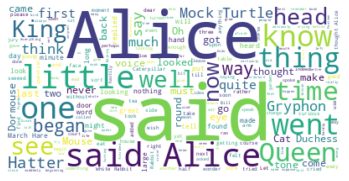

In [32]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Ubah ukuran cloud agar dapat melihat kata2 yang jarang digunakan

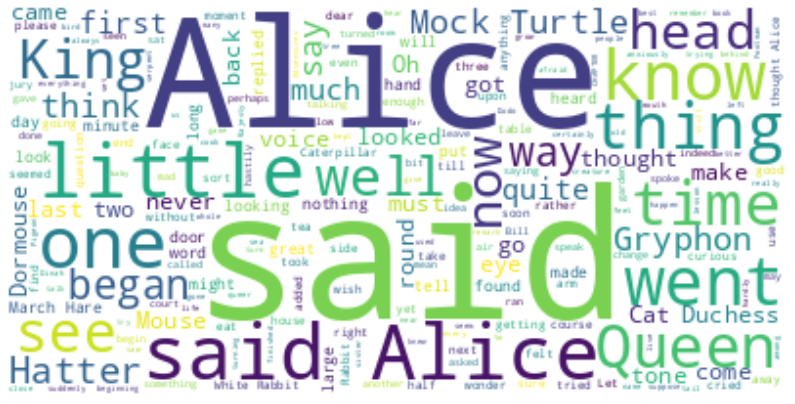

In [34]:
fig=plt.figure()
fig.set_figwidth(14)  #set width
fig.set_figheight(18) #set height

#display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Karena ada kata (said) yang tdk informatif, tambahkan stopwords dan buat ulang wordcloud

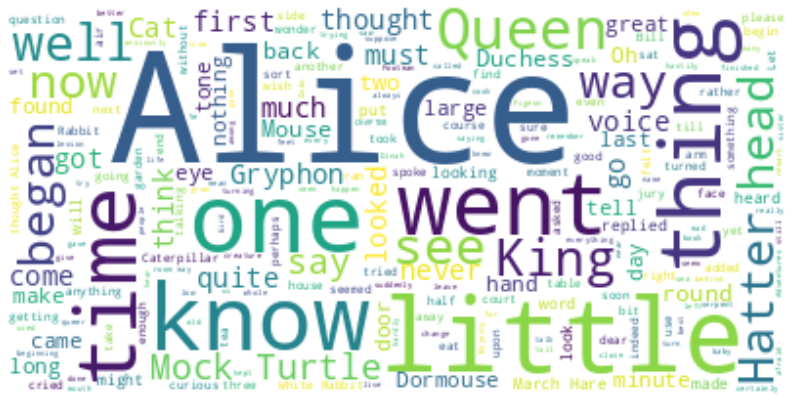

In [35]:
stopwords.add('said') #add said to stopwords

#re-generate the word cloud
alice_wc.generate(alice_novel)

#display the cloud
fig=plt.figure()
fig.set_figwidth(14)  #set width
fig.set_figheight(18) #set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Melapiskan kata2 ke mask dalam bentuk apapun

In [37]:
#save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))

print('Image downloaded and saved')

Image downloaded and saved


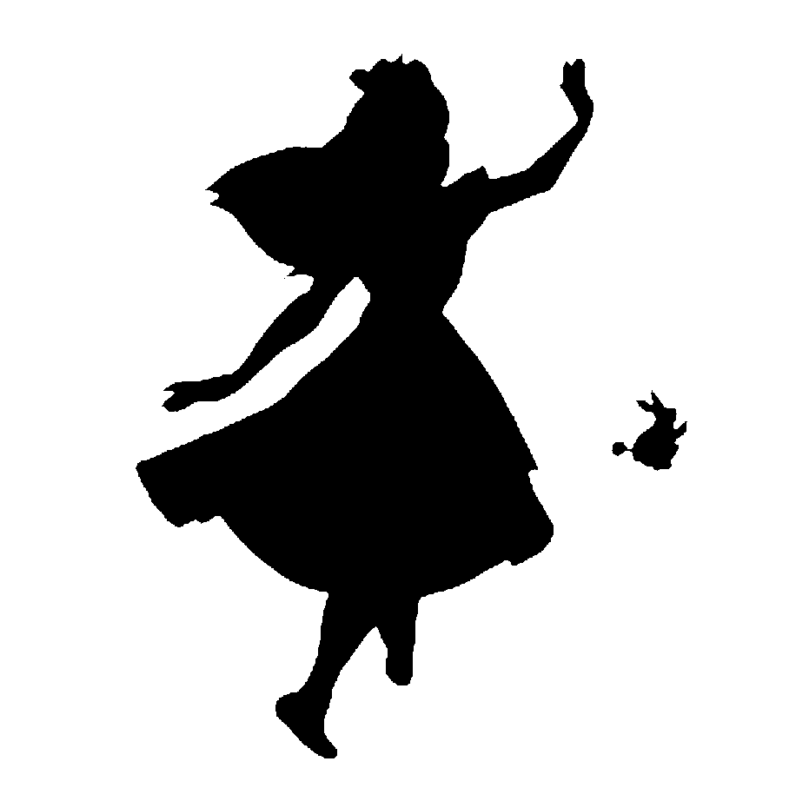

In [38]:
fig=plt.figure()
fig.set_figwidth(14)  #set width
fig.set_figheight(18) #set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Agar simpel kita trs menggunakan 2000 kata pertama dalam novel

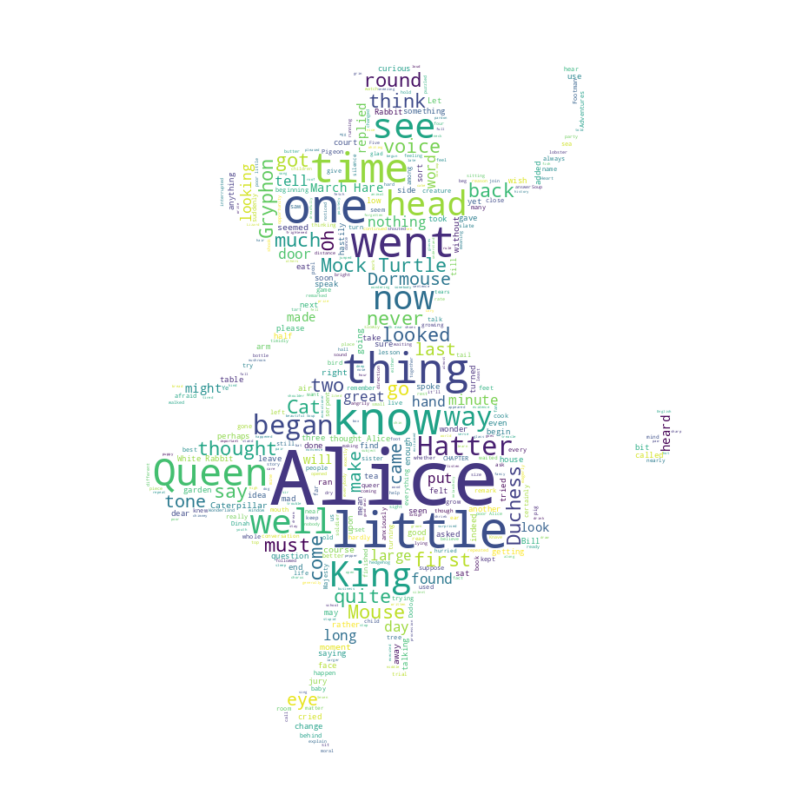

In [39]:
#instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000,
mask=alice_mask, stopwords=stopwords)

#generate the word cloud
alice_wc.generate(alice_novel)

#display the cloud
fig=plt.figure()
fig.set_figwidth(14)  #set width
fig.set_figheight(18) #set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Buat contoh data teks dari dataset imigrasi => 90 kata

In [40]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Perlu diketahui total imigrasi dari 1980-2013

In [41]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

Menggunakan countries dengan nama satu kata, mari duplikat nama masing-masing negara berdasarkan seberapa besar kontribusi mereka terhadap total imigrasi

In [42]:
max_words=90
word_string = ''
for country in df_can.index.values:
  #check if country's name is a single-word name
  if len(country.split(' '))==1:
    repeat_num_times = int(df_can.loc[country,
'Total']/float(total_immigration)*max_words)
    word_string = word_string + ((country + ' ') * repeat_num_times)

#display the generate text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [43]:
#create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created')

Word cloud created


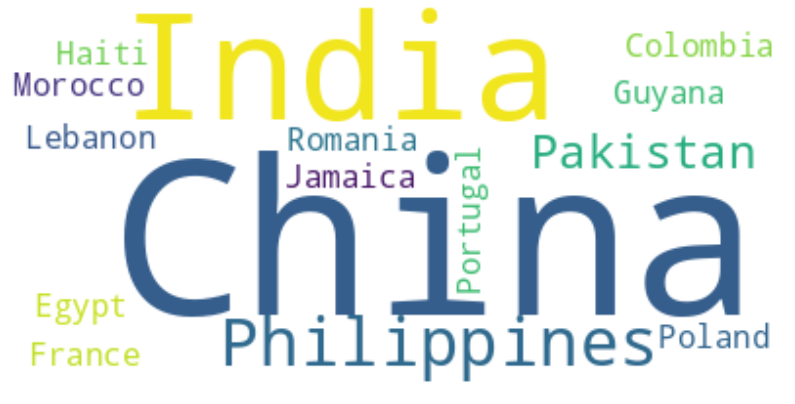

In [44]:
#display the cloud
fig=plt.figure()
fig.set_figwidth(14)  #set width
fig.set_figheight(18) #set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Regression Plots

In [46]:
#kita akan gunakan seaborn
import seaborn as sns

Buat df baru yang menyimpan jumlah total imigran yang mendarat ke Kanada per tahun dari 1980 - 2013

In [47]:
#kita bisa gunakan sum() untuk mendapatkan total populasi per tahun
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

#ubah tipe data tahun ke float untuk kepentingan regresi
df_tot.index = map(float, df_tot.index)

#reset index untuk kembalikan kolom dlm df_tot dataframe
df_tot.reset_index(inplace=True)

#rename columns
df_tot.columns = ['year', 'total']

#view the final df
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


Dengan seaborn, buat regresi semudah memanggil fungsi regplot

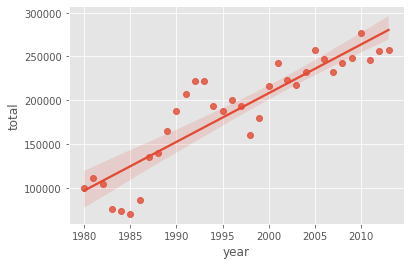

In [48]:
ax = sns.regplot(x='year', y='total', data=df_tot)

Sesuaikan warna scatter plot dan garis regresi menjadi hijau

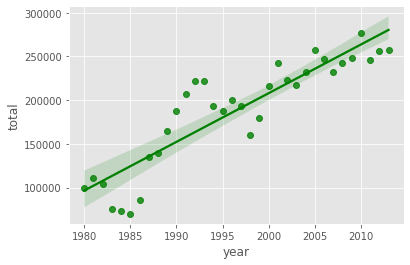

In [49]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

Sesuaikan bentuk marker, mari gunakan'+'

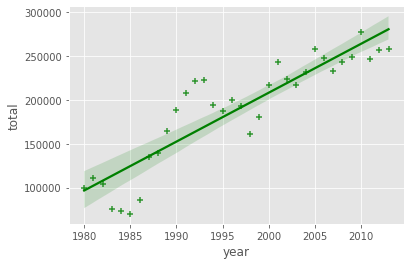

In [50]:
ax = sns.regplot(x='year', y='total', data=df_tot,color='green', marker='+')

Perbesar plot agar lebih menarik

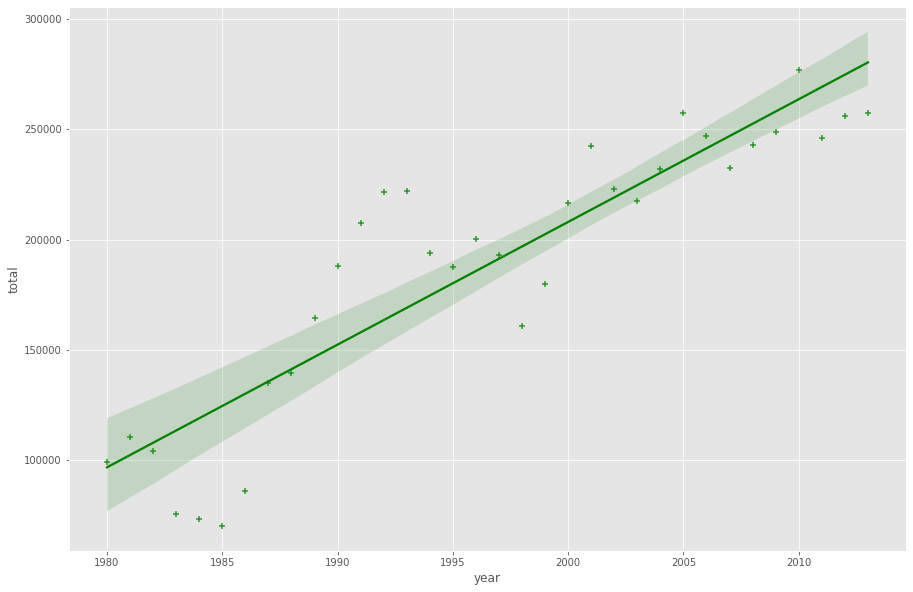

In [52]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Tingkatkan ukuran marker sehingga cocok dg ukuran baru, serta tambahkan judul serta label x dan y

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

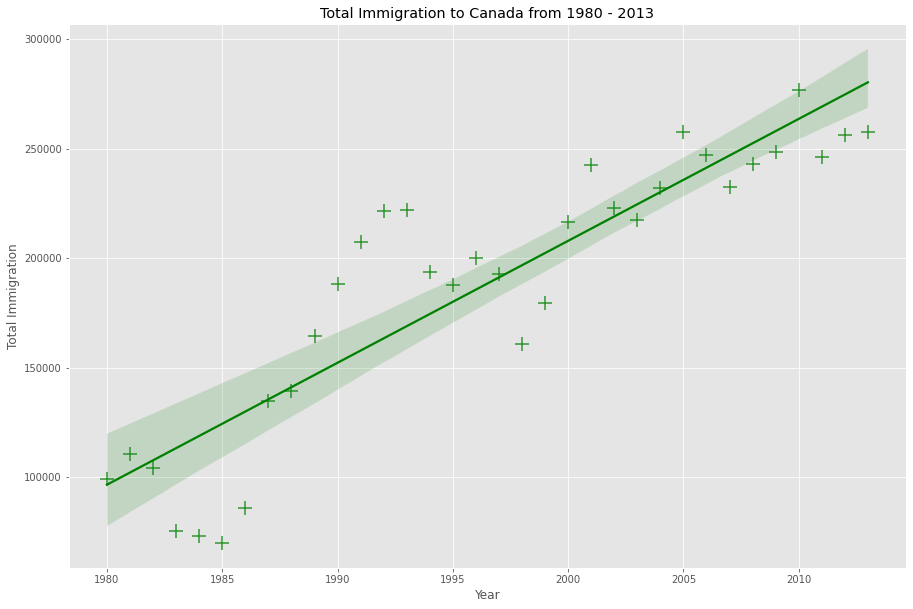

In [53]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+',
scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration') #add x- and y labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') #add title

Tingkatkan ukuran font pada label tanda centang, judul, dan label x dan y agar sama

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

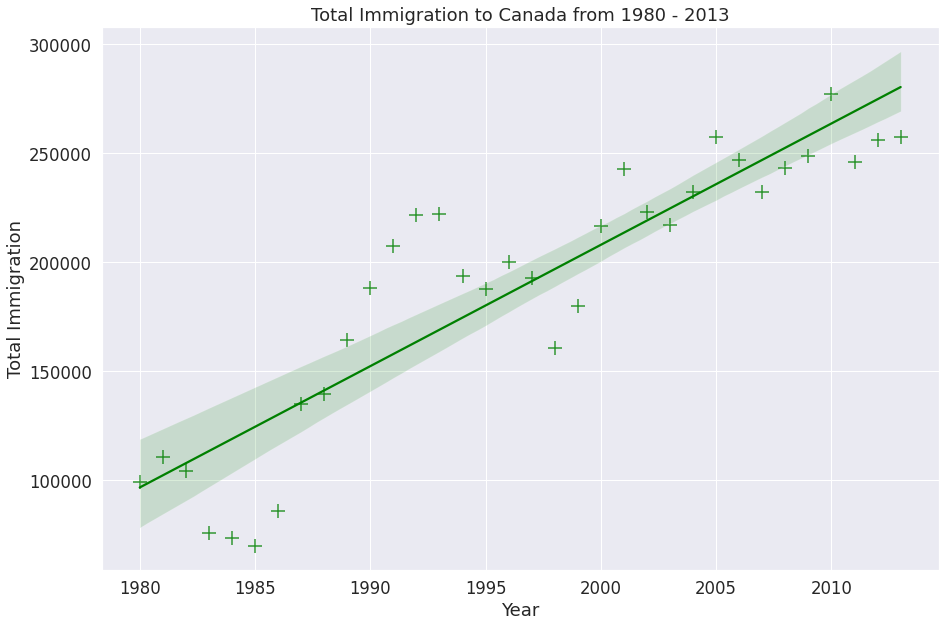

In [54]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+',
scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration') #add x- and y labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') #add title

Ubah background

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

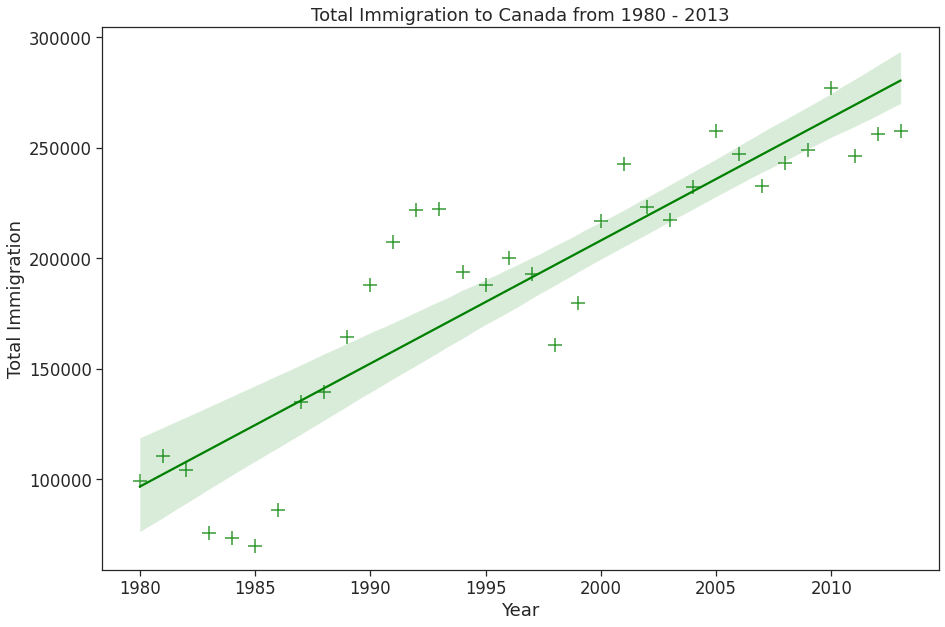

In [55]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') #change background to white
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+',
scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013') 

Menambah garis kisi

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

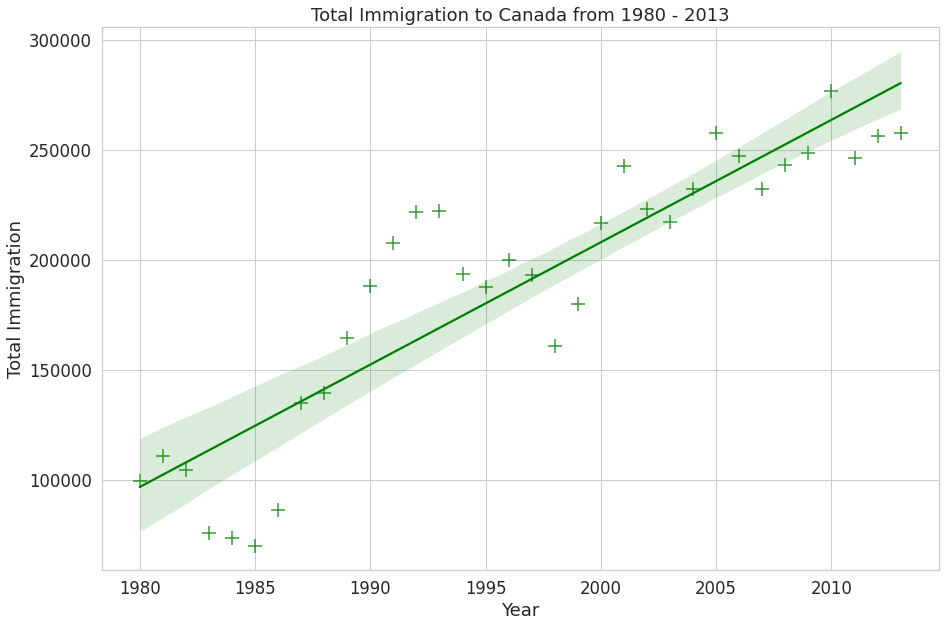

In [56]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+',
scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration') #add x- and y labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') 

## Question : Use seaborn to create a scatter plot with a regression line to visualize rhe total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

Text(0.5, 1.0, 'Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

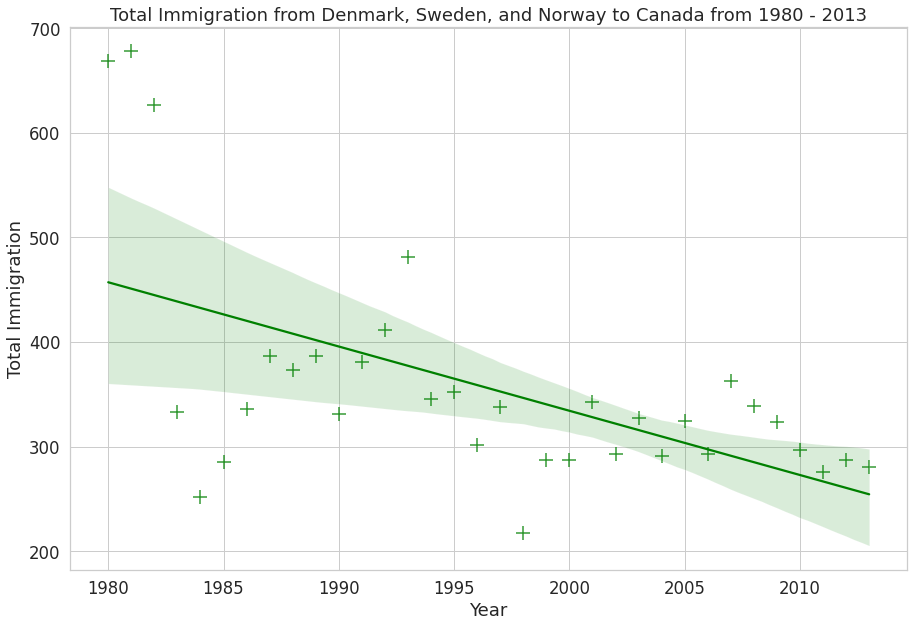

In [57]:
# create a df
df_countries = df_can.loc[['Denmark', 'Sweden', 'Norway'], years].transpose()
# create df_total by summing across three countries for each years
df_total = pd.DataFrame(df_countries.sum(axis=1))
#reset index in place
df_total.reset_index(inplace=True)
#rename columns
df_total.columns = ['year', 'total']
#change column year from strng to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
#define figure size
plt.figure(figsize=(15, 10))
#define background and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
#generate plot add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+',
scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013') 